In [20]:
# 선형 회귀
# 회귀 : x로부터 실숫값 y를 예측하는 것
# 선형 회귀 : 회귀 모델 중 예측값이 선형(직선)을 이루는 것
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

평균 제곱 오차 : 총 N개의 점에 대해 (x, y)의 각 점에서 제곱오차를 구한 다음 더한 후 평균    
예측치와 데이터의 오차를 나타내는 지표(잔차)를 최소화 해야      
![식 42.1](./img/42.1.png)      

![그림 42-2](./img/42-2.png)    
y = Wx + b에서 손실 함수의 출력을 최소화하는 W와 b를 찾는 것

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# Generate toy dataset, 실험용 작은 데이터 셋
np.random.seed(0)   # 시드값 고정
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))


def predict(x):
    y = F.matmul(x, W) + b      # b가 브로드캐스트  됨
    return y

# y = F.matmul(x, W) : 선형 변환 (완전연결계층에 해당)
# y = F.matmul(x. W) + b : 아핀 변환

코드 형상   
![그림 42-3](./img/42-3.png)

x의 데이터 차원이 4일 경우  
![그림 42-4](./img/42-4.png)

In [3]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    # Update .data attribute (No need grads when updating params)
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(f'W : {W}, b : {b}, loss : {loss}')

W : variable([[0.64433458]]), b : variable([1.29473389]), loss : variable(42.296340129442335)
W : variable([[1.12672345]]), b : variable([2.26959351]), loss : variable(23.97380754378544)
W : variable([[1.48734571]]), b : variable([3.00386712]), loss : variable(13.609686745040522)
W : variable([[1.75641886]]), b : variable([3.557186]), loss : variable(7.747049961219976)
W : variable([[1.95666851]]), b : variable([3.97439789]), loss : variable(4.43057410592155)
W : variable([[2.10518573]]), b : variable([4.28923203]), loss : variable(2.5542803813535926)
W : variable([[2.21482401]]), b : variable([4.52705574]), loss : variable(1.4925998690471942)
W : variable([[2.29524981]]), b : variable([4.70694745]), loss : variable(0.8916952181756932)
W : variable([[2.35373273]]), b : variable([4.84325585]), loss : variable(0.5514270962227453)
W : variable([[2.39573972]]), b : variable([4.9467725]), loss : variable(0.35859153083192785)
W : variable([[2.425382]]), b : variable([5.02561369]), loss : var

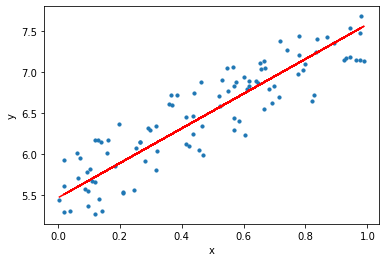

In [4]:
# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
y_pred = predict(x)
plt.plot(x.data, y_pred.data, color='r')
plt.show()

In [16]:
from dezero.core import Function
# 기존의 mean_squared_error()는 그림 42-6처럼 이름 없는 변수 3개가 있고 이 변수들은 계산 그래프가 존재하는 동안 메모리에 계속 남아있다.
# 아래처럼 수정 후 forward 메서드의 범위를 벗어나는 순간 메모리에서 삭제.
class MeanSquaredError(Function):
    def forward(self, x0, x1):
        diff = x0 - x1
        y = (diff ** 2).sum() / len(diff)
        return y

    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        gx0 = gy * diff * (2. / len(diff))
        gx1 = -gx0
        return gx0, gx1


def mean_squared_error(x0, x1):
    return MeanSquaredError()(x0, x1)


![그림 42-6](./img/42-6.png)
![그림 42-7](./img/42-7.png)

In [23]:
def predict(x):
    y = F.matmul(x, W) + b      
    return y

def mean_squared_error(x0, x1):
    return MeanSquaredError()(x0, x1)

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(f'W : {W}, b : {b}, loss : {loss}')

W : variable([[2.11563939]]), b : variable([5.46732269]), loss : variable(0.07901006311507543)
W : variable([[2.11323774]]), b : variable([5.46853978]), loss : variable(0.07893608587689341)
W : variable([[2.1108683]]), b : variable([5.46974056]), loss : variable(0.07886407946761541)
W : variable([[2.10853063]]), b : variable([5.47092523]), loss : variable(0.07879399138235389)
W : variable([[2.10622431]]), b : variable([5.47209401]), loss : variable(0.07872577051500503)
W : variable([[2.10394892]]), b : variable([5.47324712]), loss : variable(0.07865936712098352)
W : variable([[2.10170404]]), b : variable([5.47438477]), loss : variable(0.07859473278095046)
W : variable([[2.09948927]]), b : variable([5.47550715]), loss : variable(0.0785318203655074)
W : variable([[2.0973042]]), b : variable([5.47661449]), loss : variable(0.07847058400083115)
W : variable([[2.09514843]]), b : variable([5.47770698]), loss : variable(0.07841097903522362)
W : variable([[2.09302157]]), b : variable([5.4787848